<a href="https://colab.research.google.com/github/K-107/exercise/blob/main/U2net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# U2net

- 깃헙: https://github.com/xuebinqin/U-2-Net

- 논문: https://arxiv.org/pdf/2005.09007.pdf

- 내 구글드라이브 공유: https://drive.google.com/drive/folders/1B92j4PNzM_SWAkE80W022DvqcHwLzSK0?usp=sharing

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil
import cv2
from google.colab.patches import cv2_imshow

In [1]:
!git clone https://github.com/NathanUA/U-2-Net.git

Cloning into 'U-2-Net'...
remote: Enumerating objects: 879, done.
remote: Counting objects: 100% (275/275), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 879 (delta 148), reused 217 (delta 123), pack-reused 604
Receiving objects: 100% (879/879), 37.42 MiB | 27.29 MiB/s, done.
Resolving deltas: 100% (394/394), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd

/content


## 1. 사진에 효과주기

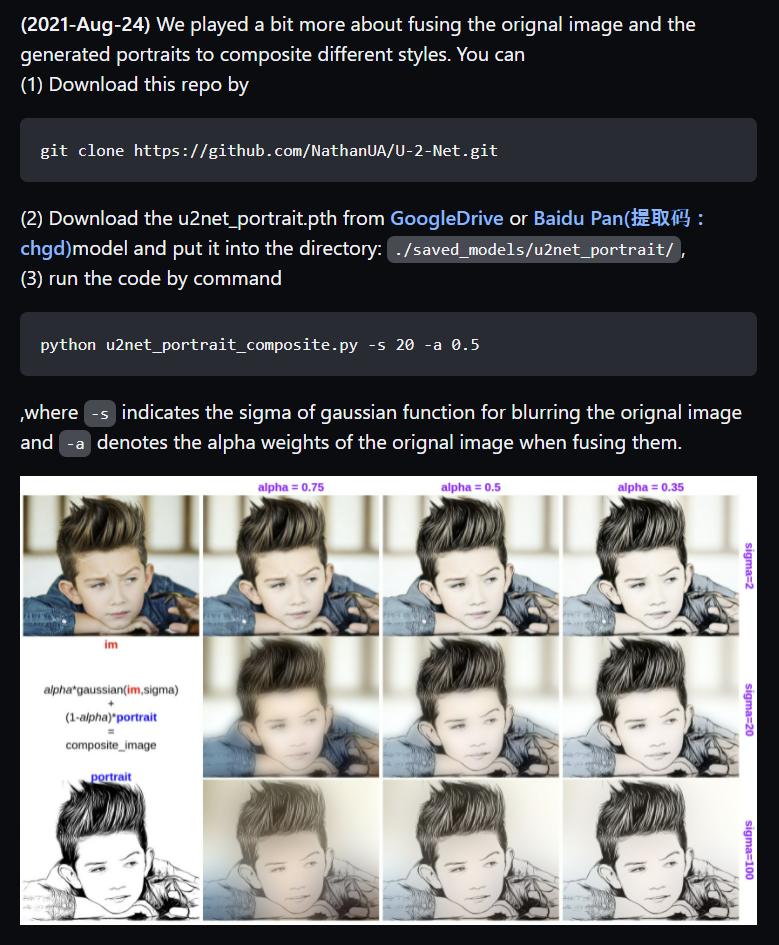

In [4]:
# pre-trained model의 pth(가중치) 가져와서 테스트!
!mkdir /content/U-2-Net/saved_models/u2net_portrait
!cp /content/drive/MyDrive/U2net/pth/u2net_portrait.pth /content/U-2-Net/saved_models/u2net_portrait/u2net_portrait.pth

In [5]:
# 헷깔리니까 기존 데이터들 삭제
!rm /content/U-2-Net/test_data/test_portrait_images/your_portrait_im/*
!rm /content/U-2-Net/test_data/test_portrait_images/your_portrait_results/*

In [6]:
# 테스트 파일 업로드
%cd /content/U-2-Net/test_data/test_portrait_images/your_portrait_im
from google.colab import files
files.upload()
%cd /content/U-2-Net

/content/U-2-Net/test_data/test_portrait_images/your_portrait_im


Saving girl.jpg to girl.jpg
/content/U-2-Net


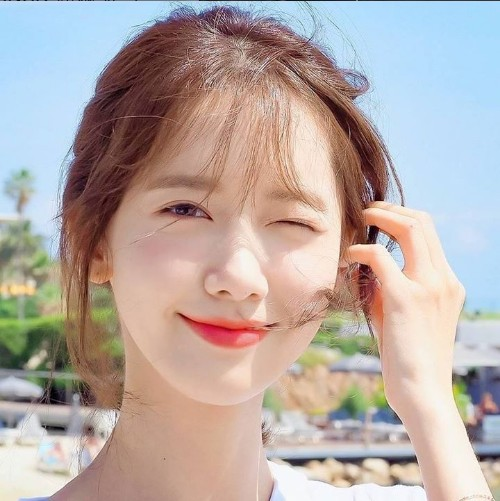

In [13]:
# 테스트 이미지 확인
IMG_PATH = '/content/U-2-Net/test_data/test_portrait_images/your_portrait_im/girl.jpg'

img = cv2.imread(IMG_PATH, cv2.IMREAD_ANYCOLOR)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
cv2_imshow(gray_img)

In [7]:
!python u2net_portrait_composite.py -s 100 -a 0.1

100
0.1
--------------------
Number of images:  1
...load U2NET---173.6 MB
inferencing: girl.jpg
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps

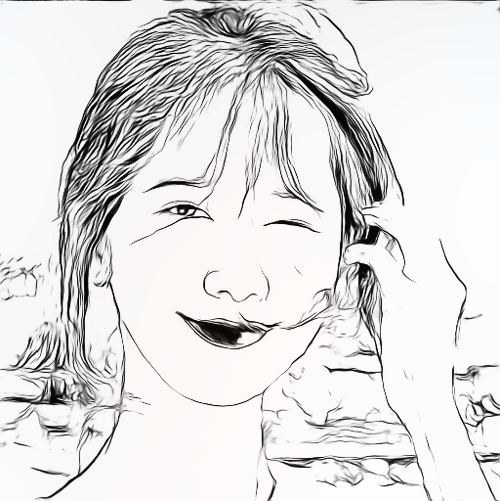

In [15]:
IMG_PATH = '/content/U-2-Net/test_data/test_portrait_images/your_portrait_results/girl_sigma_100.0_alpha_0.1_composite.png'

img = cv2.imread(IMG_PATH, cv2.IMREAD_ANYCOLOR)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
cv2_imshow(gray_img)

## 2. 사람 세그먼트

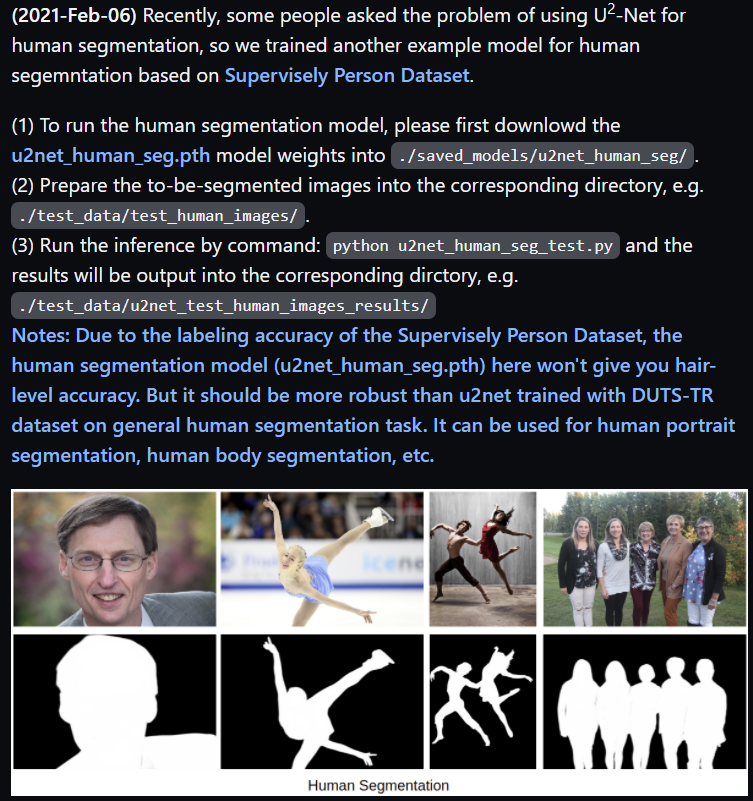

In [16]:
!pwd

/content/U-2-Net


In [17]:
!mkdir ./saved_models/u2net_human_seg

In [18]:
!cp /content/drive/MyDrive/U2net/pth/u2net_human_seg.pth ./saved_models/u2net_human_seg/u2net_human_seg.pth

In [19]:
!rm /content/U-2-Net/test_data/test_human_images/*

In [22]:
# 테스트 파일 업로드
%cd /content/U-2-Net/test_data/test_human_images
from google.colab import files
files.upload()
%cd /content/U-2-Net

/content/U-2-Net/test_data/test_human_images


Saving yoona.jpg to yoona.jpg
/content/U-2-Net


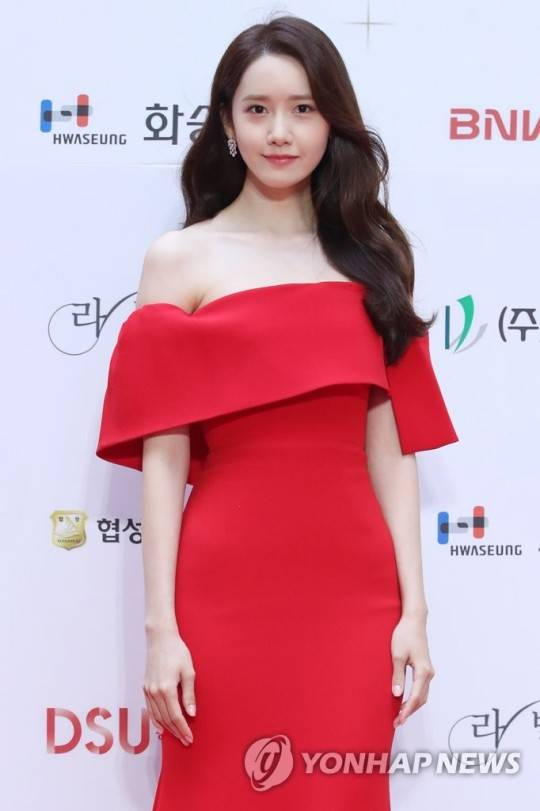

In [25]:
# 테스트 이미지 확인
IMG_PATH = '/content/U-2-Net/test_data/test_human_images/yoona.jpg'

img = cv2.imread(IMG_PATH, cv2.IMREAD_ANYCOLOR)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
cv2_imshow(gray_img)

In [26]:
!python u2net_human_seg_test.py

['/content/U-2-Net/test_data/test_human_images/yoona.jpg']
...load U2NET---173.6 MB
inferencing: yoona.jpg
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


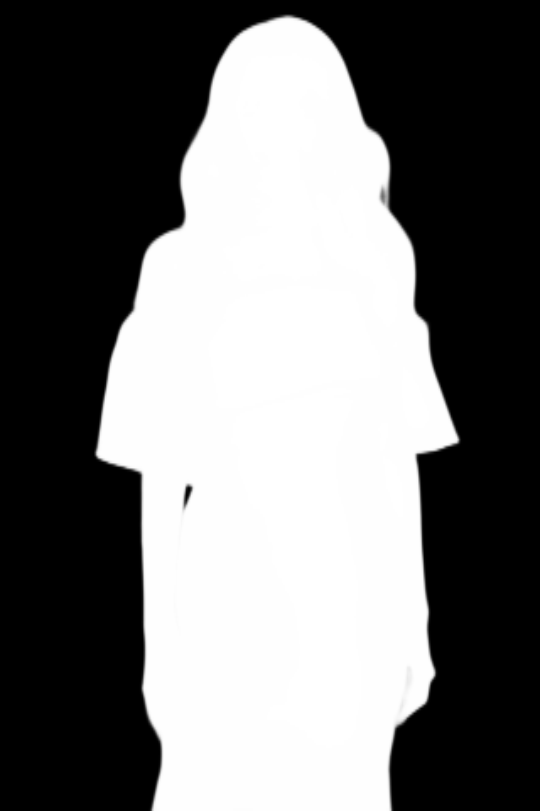

In [27]:
IMG_PATH = '/content/U-2-Net/test_data/test_human_images_results/yoona.png'

img = cv2.imread(IMG_PATH, cv2.IMREAD_ANYCOLOR)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
cv2_imshow(gray_img)

## 3. 움짤로 세그먼트하기

In [42]:
!rm /content/drive/MyDrive/U2net/capture/*

In [59]:
!rm /content/U-2-Net/test_data/test_human_images/*
!rm /content/U-2-Net/test_data/test_human_images_results/*

In [30]:
# https://alicecodealice.tistory.com/142 -> 비디오를 이미지로 풀어서 저장하기
# https://slays.tistory.com/44 -> 이미지 용량 줄이기
# https://www.programcreek.com/python/example/70397/cv2.IMWRITE_JPEG_QUALITY -> 이미지 화질 낮추기

!pip install pafy
!sudo pip install --upgrade youtube_dl

     |████████████████████████████████| 1.9 MB 5.3 MB/s 


In [47]:
import cv2
import pafy

videoFile = "/content/drive/MyDrive/U2net/video2.mp4"
vidcap = cv2.VideoCapture()
vidcap.open(videoFile)

fps = vidcap.get(cv2.CAP_PROP_FPS)
frame_count = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
print(fps, frame_count)
duration = frame_count / fps
print("영상의 길이 : ", duration, "초")

count = 0 # count 번째 사진
increase_width = 0.2 # 여기서 몇초마다 찍을건지 세팅하면 됌.
second = 0
success = True

while success and second <= duration:
  success,image = vidcap.read()
  vidcap.set(cv2.CAP_PROP_POS_MSEC, second * 1000)
  print(second, "초 에서 캡쳐")
  cv2.imwrite("/content/drive/MyDrive/U2net/capture/%d.jpg" % count, image, [int(cv2.IMWRITE_JPEG_QUALITY), 10]) # 저장시킬 위치 주소, 이미지 퀄리티 낮추기
  print("saved image %d.jpg" % count)
  count += 1
  second += increase_width
  if cv2.waitKey(10) == 27:
    break

print('----- Finish Video Capture! -----')

23.976023976023978 749.0
영상의 길이 :  31.239541666666664 초
0 초 에서 캡쳐
saved image 0.jpg
0.2 초 에서 캡쳐
saved image 1.jpg
0.4 초 에서 캡쳐
saved image 2.jpg
0.6000000000000001 초 에서 캡쳐
saved image 3.jpg
0.8 초 에서 캡쳐
saved image 4.jpg
1.0 초 에서 캡쳐
saved image 5.jpg
1.2 초 에서 캡쳐
saved image 6.jpg
1.4 초 에서 캡쳐
saved image 7.jpg
1.5999999999999999 초 에서 캡쳐
saved image 8.jpg
1.7999999999999998 초 에서 캡쳐
saved image 9.jpg
1.9999999999999998 초 에서 캡쳐
saved image 10.jpg
2.1999999999999997 초 에서 캡쳐
saved image 11.jpg
2.4 초 에서 캡쳐
saved image 12.jpg
2.6 초 에서 캡쳐
saved image 13.jpg
2.8000000000000003 초 에서 캡쳐
saved image 14.jpg
3.0000000000000004 초 에서 캡쳐
saved image 15.jpg
3.2000000000000006 초 에서 캡쳐
saved image 16.jpg
3.400000000000001 초 에서 캡쳐
saved image 17.jpg
3.600000000000001 초 에서 캡쳐
saved image 18.jpg
3.800000000000001 초 에서 캡쳐
saved image 19.jpg
4.000000000000001 초 에서 캡쳐
saved image 20.jpg
4.200000000000001 초 에서 캡쳐
saved image 21.jpg
4.400000000000001 초 에서 캡쳐
saved image 22.jpg
4.600000000000001 초 에서 캡쳐
saved image 2

In [60]:
!cp /content/drive/MyDrive/U2net/capture/* /content/U-2-Net/test_data/test_human_images

In [62]:
!python u2net_human_seg_test.py

['/content/U-2-Net/test_data/test_human_images/132.jpg', '/content/U-2-Net/test_data/test_human_images/64.jpg', '/content/U-2-Net/test_data/test_human_images/6.jpg', '/content/U-2-Net/test_data/test_human_images/1.jpg', '/content/U-2-Net/test_data/test_human_images/98.jpg', '/content/U-2-Net/test_data/test_human_images/42.jpg', '/content/U-2-Net/test_data/test_human_images/108.jpg', '/content/U-2-Net/test_data/test_human_images/59.jpg', '/content/U-2-Net/test_data/test_human_images/17.jpg', '/content/U-2-Net/test_data/test_human_images/61.jpg', '/content/U-2-Net/test_data/test_human_images/51.jpg', '/content/U-2-Net/test_data/test_human_images/7.jpg', '/content/U-2-Net/test_data/test_human_images/18.jpg', '/content/U-2-Net/test_data/test_human_images/62.jpg', '/content/U-2-Net/test_data/test_human_images/41.jpg', '/content/U-2-Net/test_data/test_human_images/65.jpg', '/content/U-2-Net/test_data/test_human_images/84.jpg', '/content/U-2-Net/test_data/test_human_images/156.jpg', '/content

In [ ]:
os.rmdir('/content/U-2-Net/test_data/test_human_images/.ipynb_checkpoints') # 자꾸 생김...

In [79]:
# https://happy-jihye.github.io/python/python-2/ -> 움짤 만들기
# https://www.iloveimg.com/ -> 움짤 크기 줄이기
# https://ezgif.com/resize -> 움짤 크기 줄이기 50mb 이하만!

import imageio
import os
from PIL import Image
import natsort


directory = '/content/U-2-Net/test_data/test_human_images_results' # 경로 지정
image_type = '.png' # 이미지 타입 지정
gif_name = 'output'
speed_sec = { 'duration': 0.1 } #사진 넘기는 시간

images = []

# 이미지 이름 순서대로 움짤을 만들려고 sorting
file_list = natsort.natsorted(os.listdir(directory))

for file in file_list:
    if file.endswith(image_type) :
        file_path = os.path.join(directory, file)
        images.append(imageio.imread(file_path))
    
imageio.mimsave('{0}/{1}.gif'.format(directory, gif_name), images, **speed_sec)
# 다운받아서 확인!

## 4. Custom Data Training

In [80]:
!pwd

/content/U-2-Net


In [86]:
# 두 폴더를 만들어야한다.
!mkdir train_data
!mkdir ./saved_models/u2net

mkdir: cannot create directory ‘train_data’: File exists


In [83]:
!unzip /content/drive/MyDrive/U2net/DUTS-TR.zip -d /content/U-2-Net/train_data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: /content/U-2-Net/train_data/DUTS-TR/DUTS-TR-Mask/n07718747_3382.png  
  inflating: /content/U-2-Net/train_data/DUTS-TR/DUTS-TR-Mask/n04270147_12691.png  
 extracting: /content/U-2-Net/train_data/DUTS-TR/DUTS-TR-Mask/n03211117_3402.png  
 extracting: /content/U-2-Net/train_data/DUTS-TR/DUTS-TR-Mask/ILSVRC2012_test_00000680.png  
  inflating: /content/U-2-Net/train_data/DUTS-TR/DUTS-TR-Mask/ILSVRC2012_val_00036949.png  
  inflating: /content/U-2-Net/train_data/DUTS-TR/DUTS-TR-Mask/ILSVRC2014_train_00033735.png  
  inflating: /content/U-2-Net/train_data/DUTS-TR/DUTS-TR-Mask/n01644900_4125.png  
  inflating: /content/U-2-Net/train_data/DUTS-TR/DUTS-TR-Mask/n04540053_2438.png  
  inflating: /content/U-2-Net/train_data/DUTS-TR/DUTS-TR-Mask/n03770439_7684.png  
  inflating: /content/U-2-Net/train_data/DUTS-TR/DUTS-TR-Mask/n07873807_5318.png  
  inflating: /content/U-2-Net/train_data/DUTS-TR/DUTS-TR-Mask/ILSVRC2014_train_00010870.png  
  inflati

In [88]:
# ValueError: num_samples should be a positive integer value, but got num_samples=0 에러
# https://github.com/sanghyun-son/EDSR-PyTorch/issues/185
'''
1. u2net_train.py의 line51~53을

data_dir = os.path.join(os.getcwd(), 'train_data' + os.sep)
tra_image_dir = os.path.join('DUTS-TR', 'DUTS-TR-Image' + os.sep)
tra_label_dir = os.path.join('DUTS-TR', 'DUTS-TR-Mask' + os.sep)

바꿔라!!

2. line 60에 에폭 조정!

3. line 116에서 모델 저장 iter 지정
'''

!python u2net_train.py

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
---
train images:  10553
train labels:  10553
---
---define optimizer...
---start training...
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.function

## 5. 뼈 해보자

In [89]:
!git clone https://github.com/K-107/exercise.git

Cloning into 'exercise'...
remote: Enumerating objects: 488, done.
remote: Counting objects: 100% (488/488), done.
remote: Compressing objects: 100% (468/468), done.
remote: Total 488 (delta 73), reused 343 (delta 6), pack-reused 0
Receiving objects: 100% (488/488), 208.62 MiB | 33.20 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [90]:
# ValueError: num_samples should be a positive integer value, but got num_samples=0 에러
# https://github.com/sanghyun-son/EDSR-PyTorch/issues/185
'''
1. u2net_train.py의 line51~56을

data_dir = '/content/U-2-Net/exercise/bone_segmentation/bone/'
tra_image_dir = '데이터/'
tra_label_dir = '라벨후/'

image_ext = '.png'
label_ext = '.jpeg'

바꿔라!!

2. line 60에 에폭 조정!

3. line 116에서 모델 저장 iter 지정
'''

!python u2net_train.py

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
l0: 0.037906, l1: 0.036955, l2: 0.038779, l3: 0.045289, l4: 0.064338, l5: 0.143907, l6: 0.252135

[epoch:  34/200, batch:     8/   20, ite: 334] train loss: 0.742143, tar: 0.058937 
l0: 0.032670, l1: 0.031605, l2: 0.033481, l3: 0.037943, l4: 0.053428, l5: 0.121154, l6: 0.216747

[epoch:  34/200, batch:    10/   20, ite: 335] train loss: 0.741501, tar: 0.058858 
l0: 0.041054, l1: 0.039143, l2: 0.041635, l3: 0.050371, l4: 0.069043, l5: 0.133871, l6: 0.264289

[epoch:  34/200, batch:    12/   20, ite: 336] train loss: 0.741197, tar: 0.058805 
l0: 0.036580, l1: 0.035857, l2: 0.038493, l3: 0.044218, l4: 0.057377, l5: 0.131665, l6: 0.233201

[epoch:  34/200, batch:    14/   20, ite: 337] train loss: 0.740711, tar: 0.058739 
l0: 0.034248, l1: 0.032584, l2: 0.034998, l3: 0.040425, l4: 0.065620, l5: 0.150392, l6: 0.199083

[epoch:  34/200, batch:    16/   20, ite: 338] train loss: 0.740168, tar: 0.058667 
l0: 0.037747, l1: 0.037385, l2: 0.040014, l3: 0.045191

### Inference

In [91]:
!rm /content/U-2-Net/test_data/test_images/*
!rm /content/U-2-Net/test_data/u2net_results/*

In [94]:
shutil.move('/content/U-2-Net/exercise/bone_segmentation/bone/테스트/7297 (2).png', '/content/U-2-Net/test_data/test_images/test.png')

'/content/U-2-Net/test_data/test_images/test.png'

In [95]:
'''
u2net_test.py -> line 63
    model_dir = '/content/U-2-Net/saved_models/u2net/u2net_bce_itr_2000_train_0.499092_tar_0.029926.pth'
바꿔라!
'''

!python u2net_test.py

['/content/U-2-Net/test_data/test_images/test.png']
...load U2NET---173.6 MB
inferencing: test.png
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


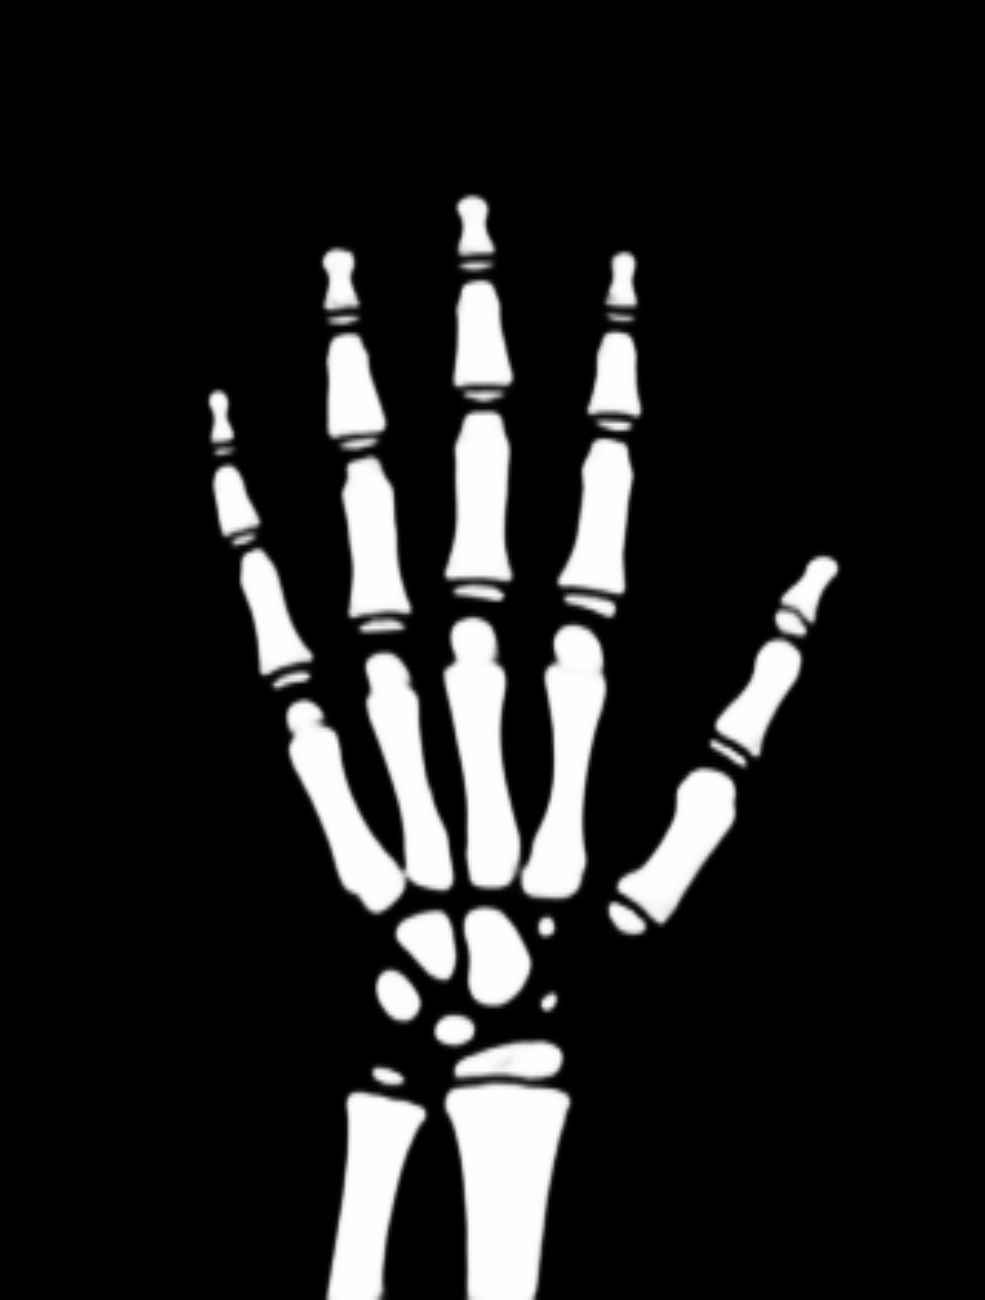

In [96]:
IMG_PATH = '/content/U-2-Net/test_data/u2net_results/test.png'

img = cv2.imread(IMG_PATH, cv2.IMREAD_ANYCOLOR)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
cv2_imshow(gray_img)

# 이미지가 블러하다.